In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')
df[:5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df = df.drop(['country'], axis=1)
strfeatures = [feature for feature in df if(type(df[feature][1])==str)]
strfeatures

['date', 'street', 'city', 'statezip']

In [6]:
import hashlib
def clean_using_hash_encode(st):
    result = hashlib.md5(st.encode())
    return(int(str(result.hexdigest())[0:10],16))

df['street'] = list(map(clean_using_hash_encode,df['street']))
df['city'] = list(map(clean_using_hash_encode,df['city']))
df['date'] = list(map(clean_using_hash_encode,df['date']))
df['statezip'] = df.statezip.str.extract('(\d+)')
df['statezip'] = df['statezip'].astype(int)


In [7]:
print(df['street'])

0        472394414644
1       1016459904603
2       1041708527481
3        376700705602
4         65756901098
            ...      
4595     238807159048
4596      62958478707
4597     131954726517
4598     492345281805
4599     959501604807
Name: street, Length: 4600, dtype: int64


In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold = 2
df = df[(z < 2).all(axis=1)]

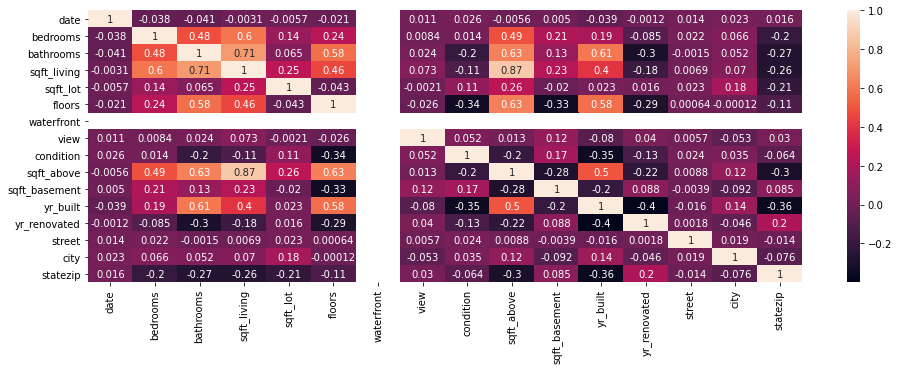

In [21]:
import seaborn as sn
corr_matrix = df.corr()
plt.figure(figsize=(16,5))
sn.heatmap(corr_matrix, annot=True)

In [10]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608523
sqft_above       0.530251
bathrooms        0.436318
floors           0.294587
bedrooms         0.285180
view             0.167327
sqft_basement    0.137316
sqft_lot         0.119207
yr_built         0.100002
date             0.017435
street           0.010275
condition       -0.043844
yr_renovated    -0.064241
statezip        -0.068379
city            -0.138580
waterfront            NaN
Name: price, dtype: float64

In [11]:
y = df.iloc[:, 1].values
df=df.drop(['price'],axis=1)
X = df.iloc[:, 0:17].values

df.iloc[:, 0:17]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,891748893444,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,472394414644,829866291672,98133
2,891748893444,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1041708527481,687981971491,98042
3,891748893444,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,376700705602,409321348840,98008
4,891748893444,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,65756901098,606984836839,98052
5,891748893444,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,953380897882,327839474676,98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,1053797611134,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,1077354313721,687981971491,98030
4595,1053797611134,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,238807159048,327839474676,98133
4596,1053797611134,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,62958478707,409321348840,98007
4598,686294176007,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,492345281805,327839474676,98178


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=25, max_leaf_nodes=200, bootstrap=True, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [14]:

print(len(y_pred))

264


In [15]:
y_pred = regressor.predict(X_test)
print("Predicted values of testing data:\n",y_pred)

Predicted values of testing data:
 [291902.93394424 278514.2220582  572533.80559363 475897.29710889
 424964.42154893 291902.93394424 478361.55009169 619294.16918601
 402428.27081262 318231.04863976 474808.62775009 344931.15292788
 299000.12288284 369909.81539588 523672.14498143 480321.97013725
 448436.13172605 417802.20840959 478494.63923231 273905.44713076
 433817.39650999 470431.31728072 394754.47351606 717159.57083061
 523549.66200658 608286.34081604 435335.02132918 248553.29643222
 546128.40128918 636348.26362956 291902.93394424 237653.09773058
 249937.44150318 231012.28952496 710112.82146529 232281.80415266
 654104.3133484  357037.8454789  412897.76043084 618914.1649196
 291902.93394424 388074.07083775 513428.03481403 314645.92004452
 450316.59461209 331955.14751904 735552.99626783 394373.50112582
 267376.66206865 247429.88055175 407826.23515695 243775.97995629
 291902.93394424 248655.14682831 481680.93288987 278199.74236555
 407794.43311283 220732.56877578 296256.2736805  511980.

In [16]:
test_score=regressor.score(X_test,y_test)
train_score=regressor.score(X_train,y_train)
print("Random forest testing score:",test_score*100)

Random forest testing score: 73.64975669076433


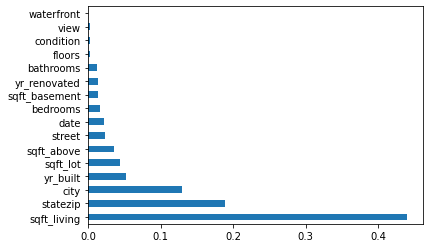

In [17]:
feature_importances = pd.Series(regressor.feature_importances_, index=df.columns)
feature_importances.nlargest(16).plot(kind='barh')

In [18]:
dfo = pd.read_csv('output.csv')
dfo = dfo.drop(['country'], axis=1)


In [19]:

dfo['date'] = list(map(clean_using_hash_encode,dfo['date']))
dfo['street'] = list(map(clean_using_hash_encode,dfo['street']))
dfo['city'] = list(map(clean_using_hash_encode,dfo['city']))
dfo['statezip'] = dfo.statezip.str.extract('(\d+)')
dfo['statezip'] = dfo['statezip'].astype(int)

y_test = dfo.iloc[:, 1].values
dfo=dfo.drop(['price'],axis=1)
X_test = dfo.iloc[:, 0:17].values

dfo.iloc[:, 0:17]
ypred = regressor.predict(X_test)


In [20]:
test_score=regressor.score(X_test,y_test)
print("Random Forest testing score:",test_score*100)

Random Forest testing score: 20.59133864089263
